#Heart Disease Prediction





*   Importing libraries
*   Importing the dataset
*   Dataset information (Pandas Profiling)
*   Spliting the Train & Test datasets
*   Feature Scaling and Feature Selection


```
# Random Forest Classifier  Model

1.   Importing the libraries
2.   Testing and training data
3.   Decision Tree
4.   Confusion matrix
5.   Sensitivity and specificity
6.   ROC(Receiver Operator Curve) and accuracy
```

```
# Logistic Regression  

1.   Importing the libraries
2.   Training data
3.   Prediction
4.   Confusion matrix
5.   Sensitivity and specificity
6.   ROC, Accuracy and AUC(area under curve)

```

```
# KNN

1.   Importing libraries
2.   Importing the dataset
3.   Feature Selection
4.   Data processing
5.   ROC and score


```



```
# ANN

1.   Building the ANN
2.   Adding the input layer and the first hidden layer
     Adding the second hidden layer
     Adding the output layer
3.   Training the ANN on the Training set
4.   Making the predictions and evaluating the model
5.   Confusion matrix and accuracy
6.   Sensitivity and specificity
```

*    Testing the model

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting

In [2]:
tf.__version__

'2.19.0'

##Random Forest Classifier Algorithm Model
Part 1 - Data Preprocessing

Importing the dataset

In [3]:
dataset = pd.read_csv('/content/heart_disease_data.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
dataset.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
5   0     1       1  
6   0     2       1  
7   0     3       1  
8   0     3       1  
9   0     2       1

The above set of data is transparent and self-explanatory. Yet, the interpretation of few of the column headers is not obvious. Here's what they mean,

**age:** The age of person in years


**cp:** The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

**chol:** The person's cholesterol measurement in mg/dl

**fbs:** The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

**restecg:** Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

**thalach:** The person's maximum heart rate achieved

**exang:** Exercise induced angina (1 = yes; 0 = no)

**oldpeak:** ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

**slope:** the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

**ca:** The number of major vessels (0-3)

**thal:** A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

**target:** Heart disease (0 = no, 1 = yes)

***Diagnosis:*** The diagnosis of heart disease is done on a combination of clinical signs and test results. The types of tests run will be chosen on the basis of what the physician thinks is going on 1, ranging from electrocardiograms and cardiac computerized tomography (CT) scans, to blood tests and exercise stress tests 2.

Looking at information of heart disease risk factors led me to the following: *high cholesterol, high blood pressure, diabetes, weight, family history and smoking* . According to another source , the major factors that can't be changed are: *increasing age, male gender and heredity. Note that thalassemia, one of the variables in this dataset, is heredity*. Major factors that can be modified are: *Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes*. Other factors include *stress, alcohol and poor diet/nutrition*.

I can see no reference to the 'number of major vessels', but given that the definition of heart disease is "**...what happens when your heart's blood supply is blocked or interrupted by a build-up of fatty substances in the coronary arteries"**, it seems logical the more major vessels is a good thing, and therefore will reduce the probability of heart disease.

Given the above, I would hypothesis that, if the model has some predictive ability, we'll see these factors standing out as the most important.

Let's change the column names to be a bit clearer,

In [6]:
dataset.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

Now, I am revising the values of categorical variables, for clearer and easy understability

In [7]:
dataset['sex'][dataset['sex'] == 0] = 'female'
dataset['sex'][dataset['sex'] == 1] = 'male'

dataset['chest_pain_type'][dataset['chest_pain_type'] == 0] = 'typical angina'
dataset['chest_pain_type'][dataset['chest_pain_type'] == 1] = 'atypical angina'
dataset['chest_pain_type'][dataset['chest_pain_type'] == 2] = 'non-anginal pain'
dataset['chest_pain_type'][dataset['chest_pain_type'] == 3] = 'asymptomatic'

dataset['fasting_blood_sugar'][dataset['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
dataset['fasting_blood_sugar'][dataset['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

dataset['rest_ecg'][dataset['rest_ecg'] == 0] = 'normal'
dataset['rest_ecg'][dataset['rest_ecg'] == 1] = 'ST-T wave abnormality'
dataset['rest_ecg'][dataset['rest_ecg'] == 2] = 'left ventricular hypertrophy'

dataset['exercise_induced_angina'][dataset['exercise_induced_angina'] == 0] = 'no'
dataset['exercise_induced_angina'][dataset['exercise_induced_angina'] == 1] = 'yes'

dataset['st_slope'][dataset['st_slope'] == 0] = 'upsloping'
dataset['st_slope'][dataset['st_slope'] == 1] = 'flat'
dataset['st_slope'][dataset['st_slope'] == 2] = 'downsloping'

dataset['thalassemia'][dataset['thalassemia'] == 1] = 'normal'
dataset['thalassemia'][dataset['thalassemia'] == 2] = 'fixed defect'
dataset['thalassemia'][dataset['thalassemia'] == 3] = 'reversable defect'


/tmp/ipython-input-4269461875.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataset['sex'][dataset['sex'] == 0] = 'female'
/tmp/ipython-input-4269461875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

Review the datatypes,

In [8]:
dataset.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

Some of those aren't quite right. The code below changes them into categorical variables,

In [9]:
dataset['sex'] = dataset['sex'].astype('object')
dataset['chest_pain_type'] = dataset['chest_pain_type'].astype('object')
dataset['fasting_blood_sugar'] = dataset['fasting_blood_sugar'].astype('object')
dataset['rest_ecg'] = dataset['rest_ecg'].astype('object')
dataset['exercise_induced_angina'] = dataset['exercise_induced_angina'].astype('object')
dataset['st_slope'] = dataset['st_slope'].astype('object')
dataset['thalassemia'] = dataset['thalassemia'].astype('object')

In [10]:
dataset.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

For the categorical varibles, we need to create dummy variables. I'm also going to drop the first category of each. For example, rather than having 'male' and 'female', we'll have 'male' with values of 0 or 1 (1 being male, and 0 therefore being female).

In [11]:
dataset = pd.get_dummies(dataset, drop_first=True)

Now, lets see

In [12]:
dataset.head()

age  resting_blood_pressure  cholesterol  max_heart_rate_achieved  \
0   63                     145          233                      150   
1   37                     130          250                      187   
2   41                     130          204                      172   
3   56                     120          236                      178   
4   57                     120          354                      163   

   st_depression  num_major_vessels  target  sex_male  \
0            2.3                  0       1      True   
1            3.5                  0       1      True   
2            1.4                  0       1     False   
3            0.8                  0       1      True   
4            0.6                  0       1     False   

   chest_pain_type_atypical angina  chest_pain_type_non-anginal pain  \
0                            False                             False   
1                            False                              True   
2                             True                             False   
3                             True                             False   
4                            False                             False   

   chest_pain_type_typical angina  fasting_blood_sugar_lower than 120mg/ml  \
0                           False                                    False   
1                           False                                     True   
2                           False                                     True   
3                           False                                     True   
4                            True                                     True   

   rest_ecg_left ventricular hypertrophy  rest_ecg_normal  \
0                                  False             True   
1                                  False            False   
2                                  False             True   
3                                  False            False   
4                                  False            False   

   exercise_induced_angina_yes  st_slope_flat  st_slope_upsloping  \
0                        False          False                True   
1                        False          False                True   
2                        False          False               False   
3                        False          False               False   
4                         True          False               False   

   thalassemia_fixed defect  thalassemia_normal  thalassemia_reversable defect  
0                     False                True                          False  
1                      True               False                          False  
2                      True               False                          False  
3                      True               False                          False  
4                      True               False                          False

Dataset information (Pandas Profiling)

In [13]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (17.9 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [14]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport

/tmp/ipython-input-3916717816.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [15]:
import pandas_profiling as pp
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [16]:
pp.ProfileReport(dataset, title = 'Pandas Profiling report of "dataset"', html = {'style':{'full_width': True}})

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 20/20 [00:00<00:00, 225.44it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Splitting the dataset into the Training set and Test set

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Feature Scaling

In [109]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Feature Selection

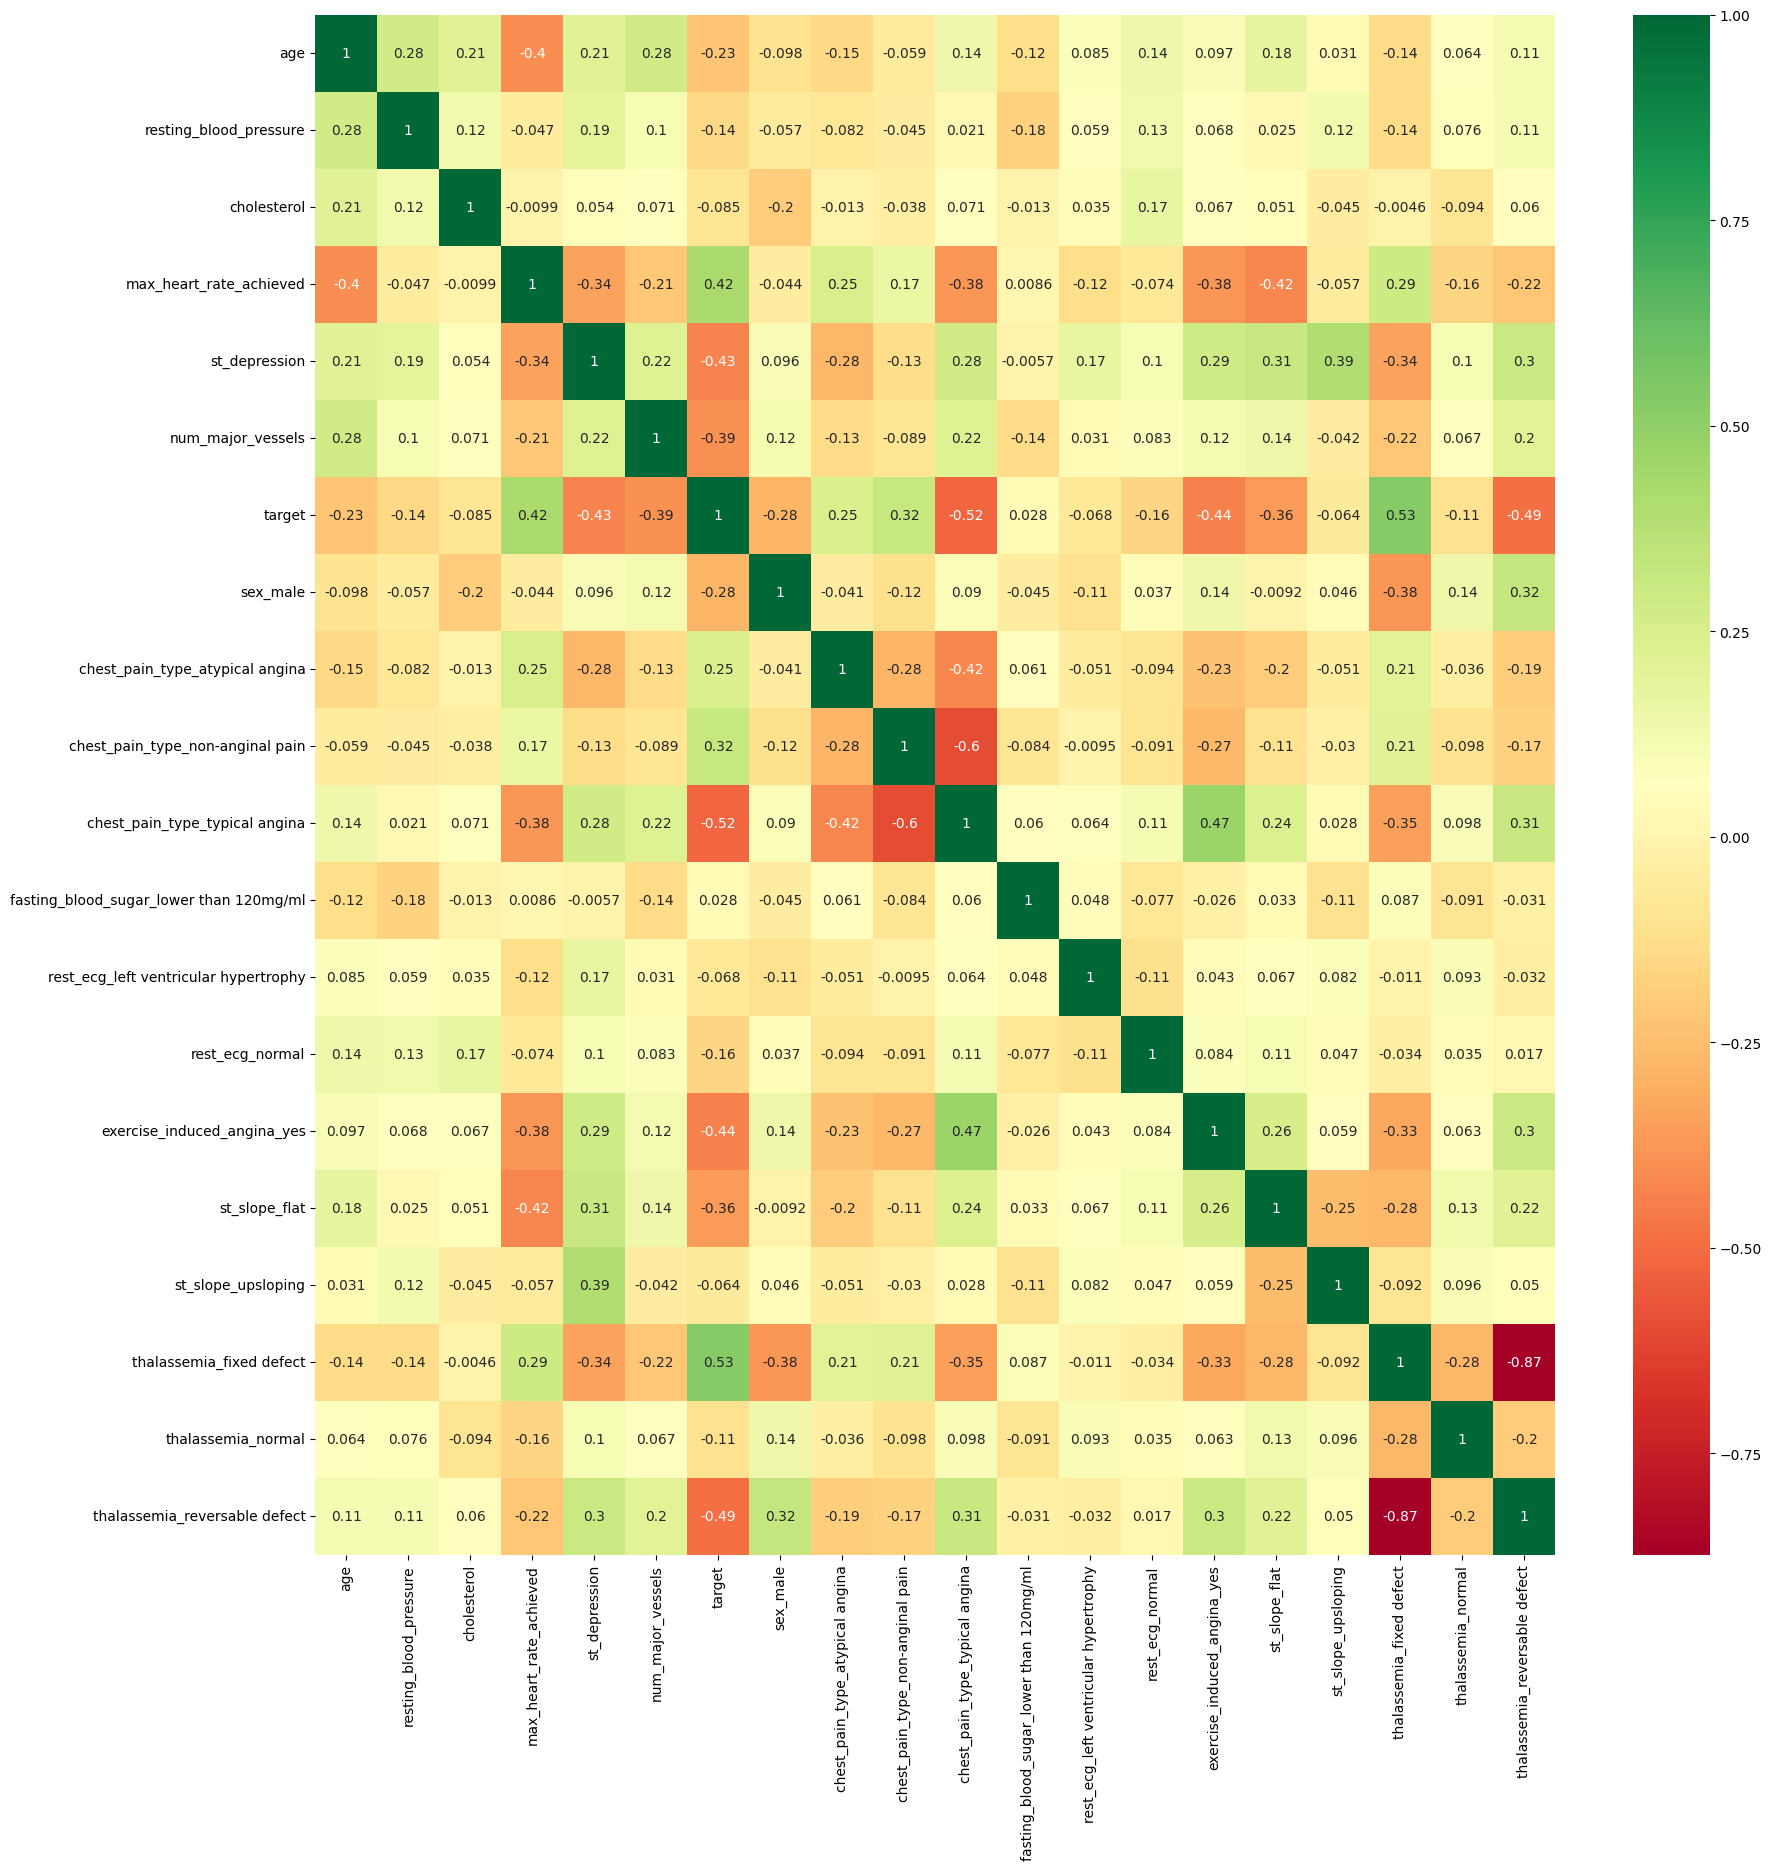

In [19]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'resting_blood_pressure'}>,
        <Axes: title={'center': 'cholesterol'}>],
       [<Axes: title={'center': 'max_heart_rate_achieved'}>,
        <Axes: title={'center': 'st_depression'}>,
        <Axes: title={'center': 'num_major_vessels'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

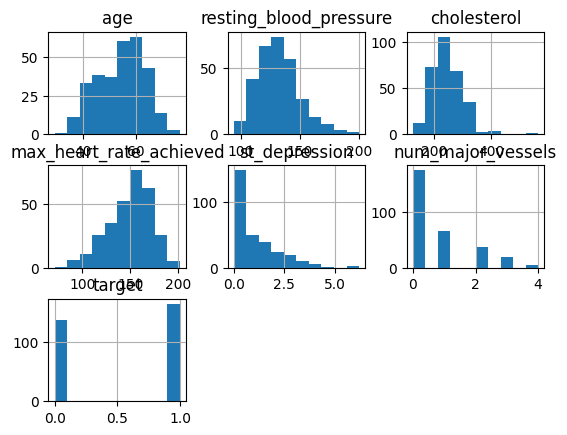

In [21]:
dataset.hist()

<Axes: xlabel='target', ylabel='count'>

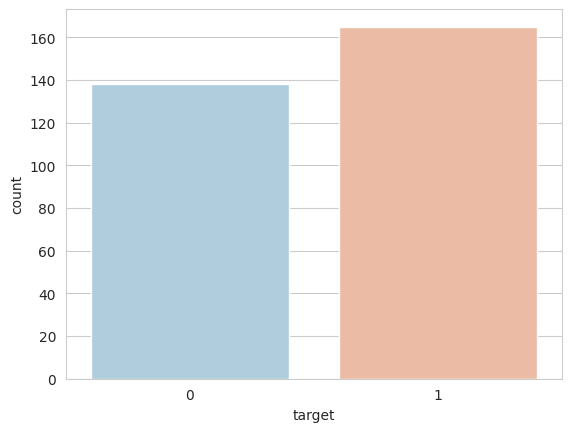

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=dataset,palette='RdBu_r')

This gives us on explainability tool. However, I can't glance at this and get a quick sense of the most important features. We'll revisit those later.



#Random Forest Classifier and Decision tree  Model




In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import call

# Assuming 'dataset' is already defined with your data
X = dataset.drop('target', axis=1)  # Drop 'target' column, use axis=1 for columns
y = dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)


# Decision Tree
estimator = model.estimators_[1]
feature_names = X_train.columns  # Use columns from X_train

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'

export_graphviz(estimator, out_file='tree.dot',
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True,
                label='root',
                precision = 2, filled = True)

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

Image(filename = 'tree.png')

In [24]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

Assess the fit with a confusion matrix,

In [25]:
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix

array([[25,  4],
       [ 4, 28]])

In [26]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_bin)
print("Accuracy:", accuracy)
accuracy_rf = accuracy

Accuracy: 0.8688524590163934


In [27]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred_bin)
print("Precision:", precision)

Precision: 0.875


In [28]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_bin)
print("F1 Score:", f1)

F1 Score: 0.875


In [29]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
recall = recall_score(y_test, y_pred_bin)
print("Recall:", recall)

Recall: 0.875


Diagnostic tests are often sold, marketed, cited and used with sensitivity and specificity as the headline metrics. Sensitivity and specificity are defined as,

In [30]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8620689655172413
Specificity :  0.875


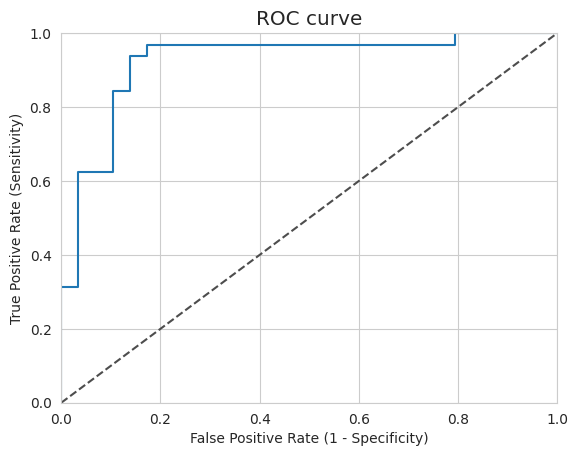

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

That seems reasonable. Let's also check with a Receiver Operator Curve (ROC),

Another common metric is the Area Under the Curve, or AUC. This is a convenient way to capture the performance of a model in a single number, although it's not without certain issues. As a rule of thumb, an AUC can be classed as follows,

0.90 - 1.00 = excellent

0.80 - 0.90 = good

0.70 - 0.80 = fair

0.60 - 0.70 = poor

0.50 - 0.60 = fail

Let's see what the above ROC gives us,

In [32]:
auc(fpr, tpr)

np.float64(0.9234913793103449)

Cross Validation

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
results = {}
for metric in metrics:
  scores = cross_val_score(model, X, y, cv=cv, scoring=metric)
  results[metric] = scores

# Print the cross-validation results
for metric in metrics:
  print(f'{metric.capitalize()}: {results[metric].mean():.4f} (std: {results[metric].std():.4f})')


Accuracy: 0.8483 (std: 0.0579)
Precision: 0.8396 (std: 0.0768)
Recall: 0.8909 (std: 0.0454)
F1: 0.8484 (std: 0.0566)
Roc_auc: 0.9161 (std: 0.0423)


#Logistic regression

In [34]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [35]:
datasetlr = pd.read_csv('/content/heart_disease_data.csv')
X_lr = datasetlr.iloc[:, 3:-1].values
y_lr = datasetlr.iloc[:, -1].values


In [36]:
X_trainlr, X_testlr, y_trainlr, y_testlr = train_test_split(X_lr, y_lr, test_size = 0.2, random_state = 42)

In [37]:
# Create and train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_trainlr, y_trainlr)


LogisticRegression()

In [38]:
# Make predictions
y_predlr = logreg.predict(X_testlr)

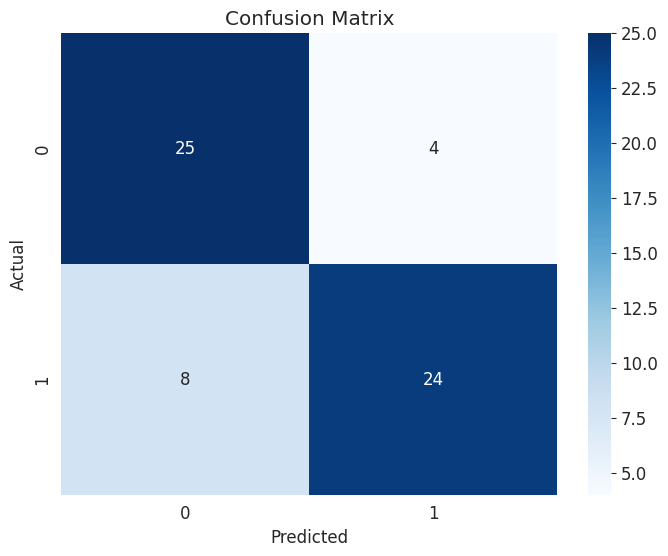

In [39]:
# Confusion Matrix
cmlr = confusion_matrix(y_testlr, y_predlr)
plt.figure(figsize=(8, 6))
sns.heatmap(cmlr, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
# Calculate sensitivity
sensitivity = cmlr[0, 0] / (cmlr[0, 0] + cmlr[1, 0])
print('Sensitivity:', sensitivity)

# Calculate specificity
specificity = cmlr[1, 1] / (cmlr[1, 1] + cmlr[0, 1])
print('Specificity:', specificity)


Sensitivity: 0.7575757575757576
Specificity: 0.8571428571428571


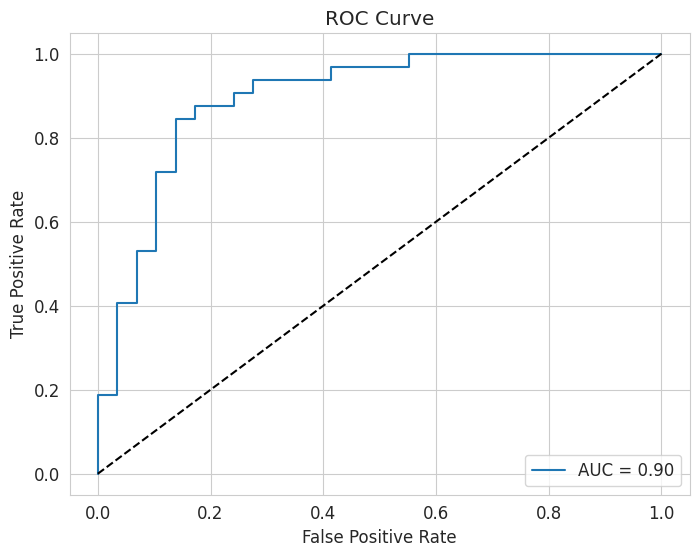

In [41]:
# ROC Curve and AUC
y_predlr_proba = logreg.predict_proba(X_testlr)[:, 1]
y_predlr = logreg.predict(X_testlr)
y_predlr_quant = logreg.predict_proba(X_testlr)[:, 1]
fpr, tpr, thresholds = roc_curve(y_testlr, y_predlr_quant)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [42]:
# Calculate accuracy
accuracy = (cmlr[0, 0] + cmlr[1, 1]) / total
print('Accuracy:', accuracy)
accuracy_lr = accuracy

Accuracy: 0.8032786885245902


In [43]:
from sklearn.metrics import precision_score

precision = precision_score(y_testlr, y_predlr)
print("Precision:", precision)

Precision: 0.8571428571428571


In [44]:
f1 = f1_score(y_testlr, y_predlr)
print("F1 Score:", f1)

F1 Score: 0.8


In [45]:
from sklearn.metrics import recall_score

recall = recall_score(y_testlr, y_predlr)
print("Recall:", recall)

Recall: 0.75


In [46]:
print(f'AUC: {roc_auc:.2f}')

AUC: 0.90


In [47]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create a Logistic Regression model
logreg = LogisticRegression()

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the metrics to evaluate
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
results = {}

# Perform cross-validation for each metric
for metric in metrics:
  scores = cross_val_score(logreg, X_lr, y_lr, cv=cv, scoring=metric)
  results[metric] = scores

# Print the cross-validation results
for metric in metrics:
  print(f'{metric.capitalize()}: {results[metric].mean():.4f} (std: {results[metric].std():.4f})')


Accuracy: 0.7755 (std: 0.0499)
Precision: 0.7735 (std: 0.0703)
Recall: 0.8485 (std: 0.0469)
F1: 0.8060 (std: 0.0337)
Roc_auc: 0.8652 (std: 0.0529)


#KNN Model

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [49]:
df1 = pd.read_csv('/content/heart_disease_data.csv')

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [51]:
df1.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

Feature selection

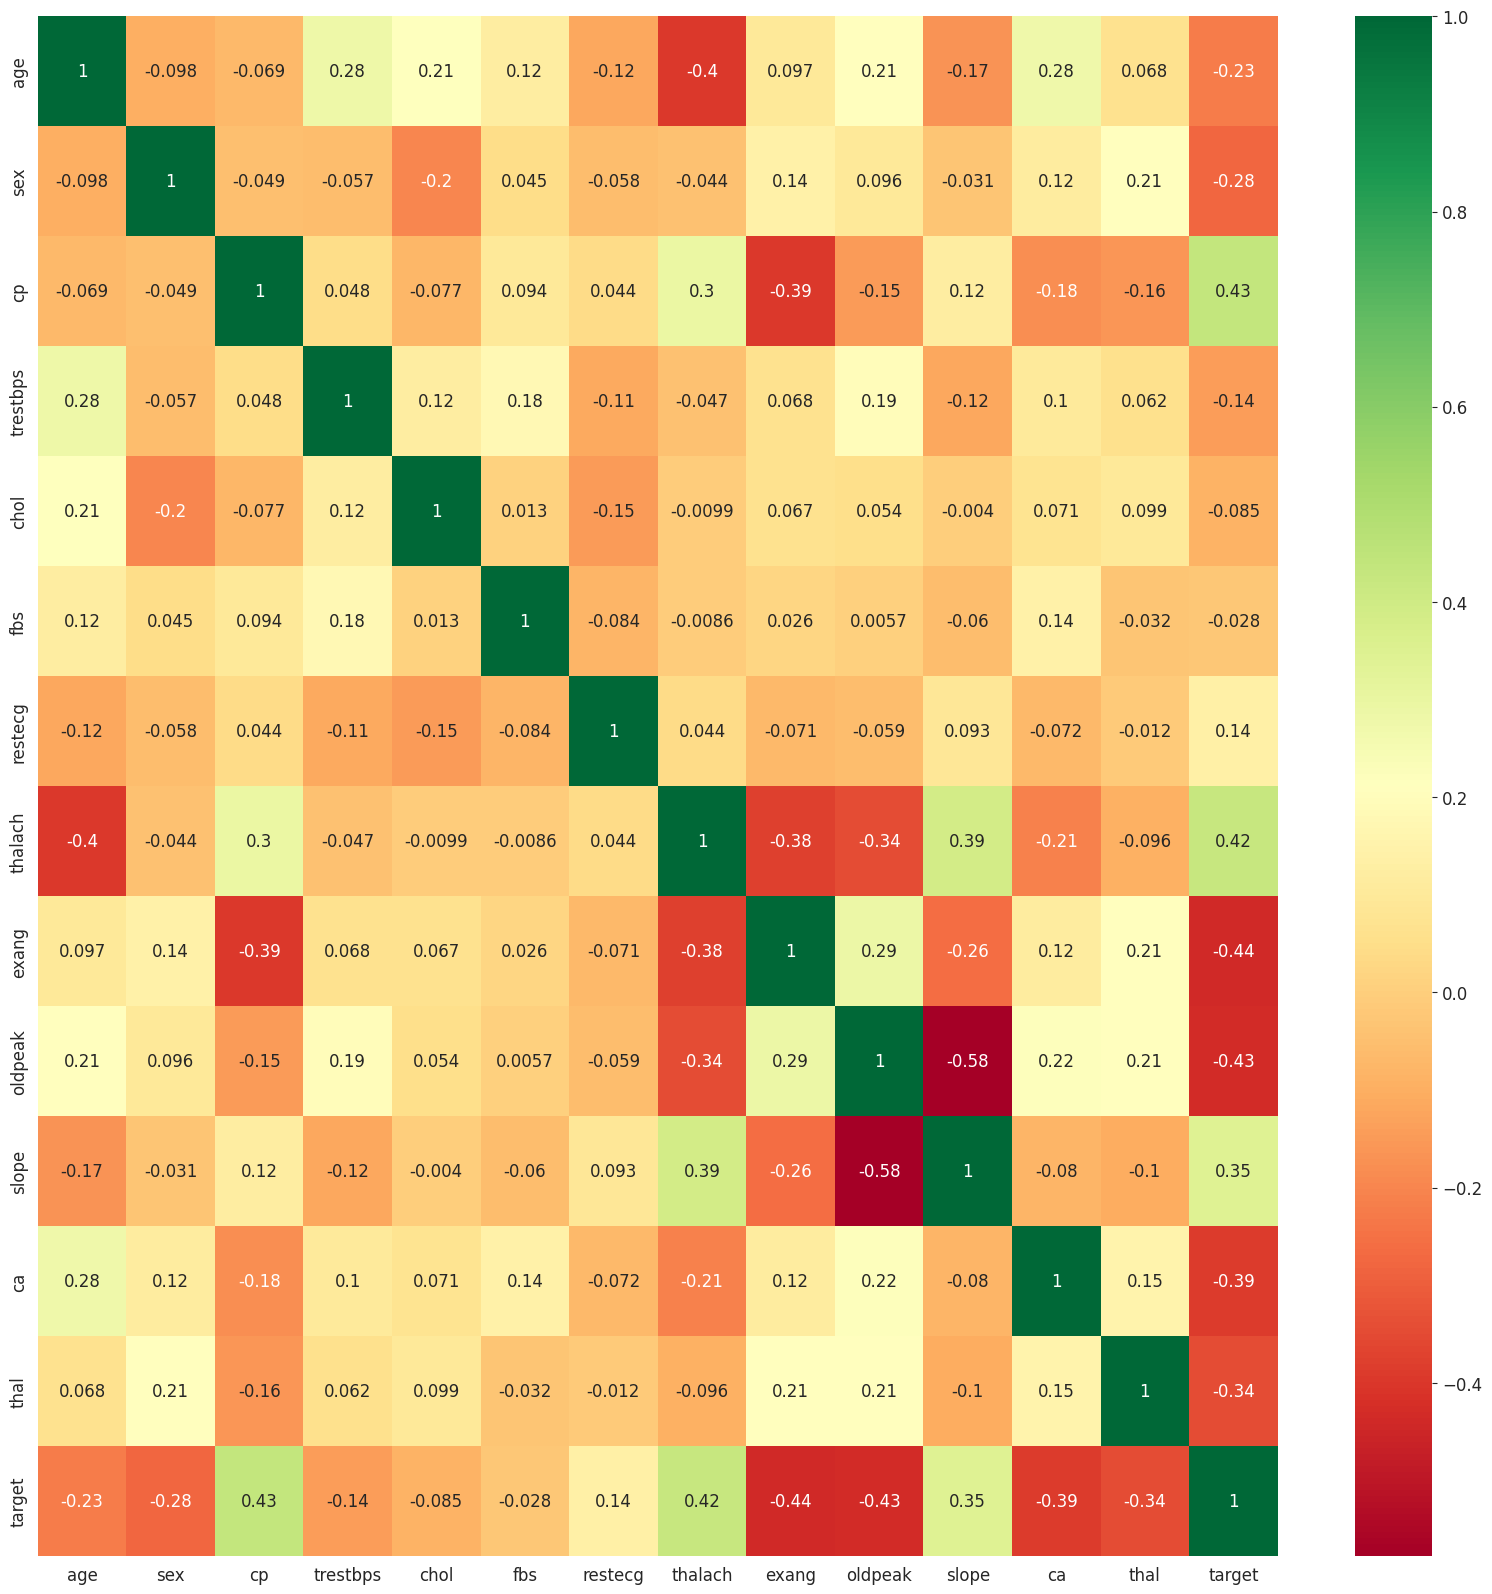

In [52]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

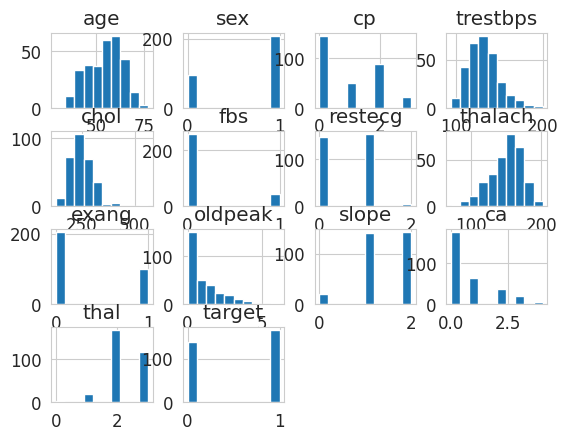

In [53]:
df1.hist()

<Axes: xlabel='target', ylabel='count'>

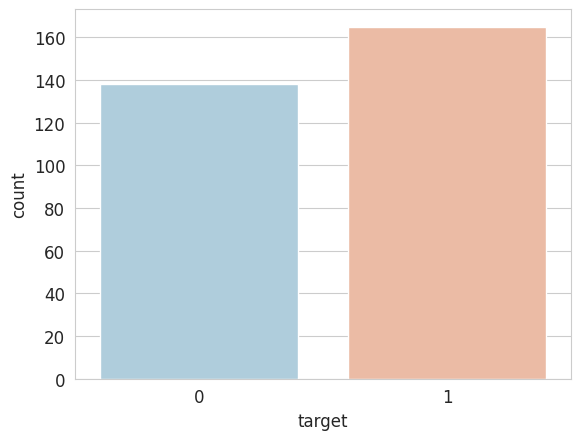

In [54]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df1,palette='RdBu_r')

Data Processing

In [55]:
dataset1 = pd.get_dummies(df1, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset1[columns_to_scale] = standardScaler.fit_transform(dataset1[columns_to_scale])

In [57]:
dataset1.head()

age  trestbps      chol   thalach   oldpeak  target  sex_0  sex_1  \
0  0.952197  0.763956 -0.256334  0.015443  1.087338       1  False   True   
1 -1.915313 -0.092738  0.072199  1.633471  2.122573       1  False   True   
2 -1.474158 -0.092738 -0.816773  0.977514  0.310912       1   True  False   
3  0.180175 -0.663867 -0.198357  1.239897 -0.206705       1  False   True   
4  0.290464 -0.663867  2.082050  0.583939 -0.379244       1   True  False   

    cp_0   cp_1  ...  slope_2  ca_0   ca_1   ca_2   ca_3   ca_4  thal_0  \
0  False  False  ...    False  True  False  False  False  False   False   
1  False  False  ...    False  True  False  False  False  False   False   
2  False   True  ...     True  True  False  False  False  False   False   
3  False   True  ...     True  True  False  False  False  False   False   
4   True  False  ...     True  True  False  False  False  False   False   

   thal_1  thal_2  thal_3  
0    True   False   False  
1   False    True   False  
2   False    True   False  
3   False    True   False  
4   False    True   False  

[5 rows x 31 columns]

In [58]:
y1 = dataset1['target']
X1 = dataset1.drop(['target'], axis = 1)

In [59]:
from sklearn.model_selection import train_test_split
X_trainknn, X_testknn, y_trainknn, y_testknn = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [60]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X1,y1,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

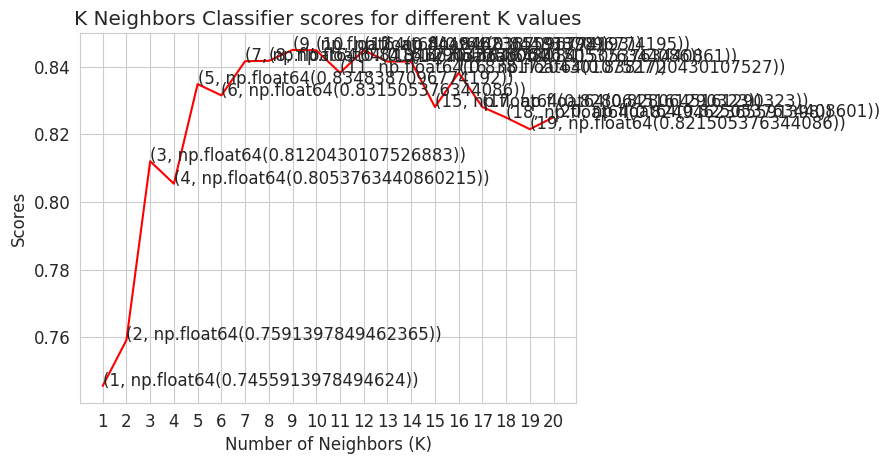

In [61]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [62]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X1,y1,cv=10)

In [63]:
score.mean()
accuracy_knn = score.mean()

In [64]:
from sklearn.metrics import precision_score

knn_classifier.fit(X_trainknn, y_trainknn)
y_pred_knn = knn_classifier.predict(X_testknn)

precision_knn = precision_score(y_testknn, y_pred_knn)
print("Precision:", precision_knn)

Precision: 0.90625


In [65]:
f1_knn = f1_score(y_testknn, y_pred_knn)
print("F1 Score:", f1_knn)


F1 Score: 0.90625


In [66]:
from sklearn.metrics import recall_score

recall_knn = recall_score(y_testknn, y_pred_knn)
print("Recall:", recall_knn)


Recall: 0.90625


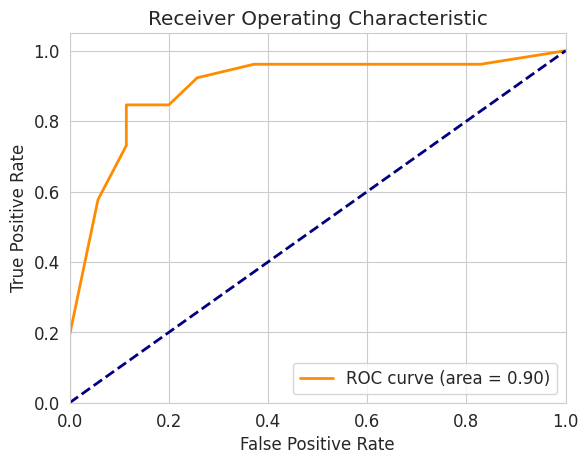

In [67]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X1,y1,cv=10)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 10)
knn_classifier.fit(X1_train, y1_train)
y_pred_proba = knn_classifier.predict_proba(X1_test)[:,1]
fpr, tpr, thresholds = roc_curve(y1_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [68]:
auc(fpr, tpr)

np.float64(0.8978021978021978)

Cross validation

In [69]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Create a KNN classifier with the best k value (found earlier)
knn_classifier = KNeighborsClassifier(n_neighbors=12)

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define the metrics to evaluate
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
results = {}

# Perform cross-validation for each metric
for metric in metrics:
  if metric == 'roc_auc':
    scores = cross_val_score(knn_classifier, X1, y1, cv=cv, scoring='roc_auc')
  else:
    scores = cross_val_score(knn_classifier, X1, y1, cv=cv, scoring=metric)
  results[metric] = scores

# Print the cross-validation results
for metric in metrics:
  print(f'{metric.capitalize()}: {results[metric].mean():.4f} (std: {results[metric].std():.4f})')


Accuracy: 0.8346 (std: 0.0476)
Precision: 0.8509 (std: 0.0700)
Recall: 0.8548 (std: 0.0874)
F1: 0.8480 (std: 0.0471)
Roc_auc: 0.9033 (std: 0.0563)


#ANN

Building the ANN

In [70]:
datasetann = pd.read_csv('/content/heart_disease_data.csv')

In [71]:
X3 = datasetann.iloc[:, :-1].values
y3 = datasetann.iloc[:, -1].values


Initializing the ANN

In [72]:
tf.random.set_seed(42)

In [73]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2, random_state = 42)

In [74]:
ann = tf.keras.models.Sequential()

Adding the input layer and the first hidden layer

In [75]:
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))

Adding the second hidden layer

In [76]:
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))

In [77]:
#adding dropout layer
ann.add(tf.keras.layers.Dropout(0.5))

In [78]:
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

In [79]:
#adding another hidden layer
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

In [80]:
#adding another dropout layer
ann.add(tf.keras.layers.Dropout(0.5))

Adding the output layer

In [81]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Compiling the ANN

In [82]:
ann.compile(optimizer = 'adamW', loss = 'binary_crossentropy', metrics = ['accuracy'])

Training the ANN on the Training set

In [83]:
ann.fit(X_train3, y_train3, batch_size = 32, epochs = 300)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 261ms/step - accuracy: 0.4764 - loss: 12.2513
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5191 - loss: 5.4867 
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5186 - loss: 5.1205 
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4455 - loss: 4.0918 
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4658 - loss: 2.7940 
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4875 - loss: 2.5155 
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5465 - loss: 1.5465 
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5915 - loss: 1.1423 
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5546 - loss: 1.1355 
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4551 - loss: 1.2391 
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4906 - loss: 1.0384 
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5286 - l

**Making** the predictions and evaluating the model

Predicting the Test set results

In [84]:
y_pred3 = ann.predict(X_test3)
y_pred3 = (y_pred3 > 0.5)
# Extract NumPy arrays from Series before reshaping
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test.values.reshape(len(y_test3),1)),1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 486ms/step
[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


Making the Confusion Matrix

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm3 = confusion_matrix(y_test3, y_pred3)
print(cm3)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test3, y_pred3)*100))
accuracy_ann = accuracy_score(y_test3, y_pred3)


[[27  2]
 [ 8 24]]
Accuracy: 83.61%


In [86]:
from sklearn.metrics import precision_score
precision = precision_score(y_test3, y_pred3)
print("Precision:", precision)

Precision: 0.9230769230769231


In [87]:
f1 = f1_score(y_test3, y_pred3)
print("F1 Score:", f1)

F1 Score: 0.8275862068965517


In [88]:
from sklearn.metrics import recall_score
recall = recall_score(y_test3, y_pred3)
print("Recall:", recall)


Recall: 0.75


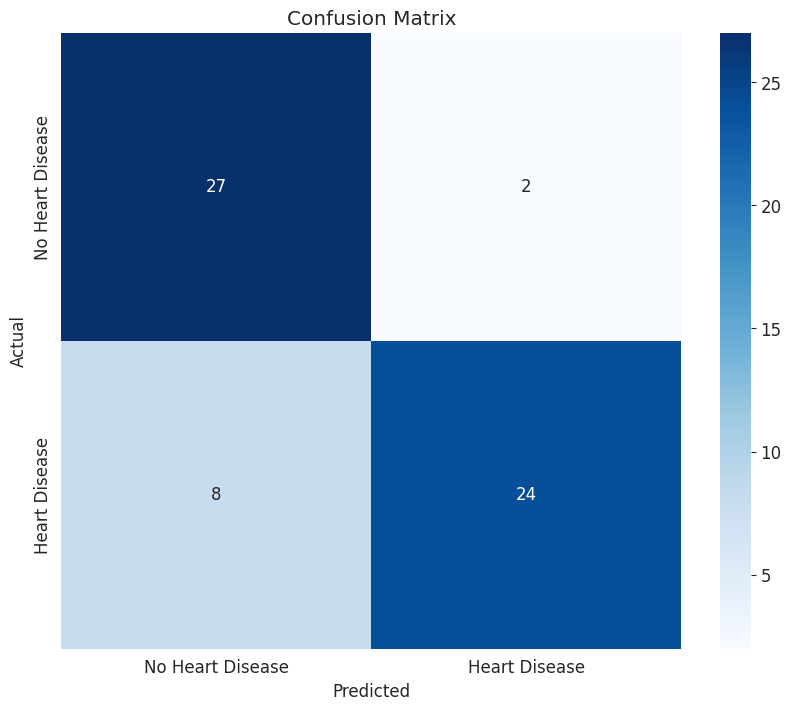

In [89]:
import matplotlib.pyplot as plt
# Making the Confusion Matrix
cm3 = confusion_matrix(y_test3, y_pred3)

# Define the labels for the confusion matrix
labels = ['No Heart Disease', 'Heart Disease']

# Plot the confusion matrix with larger figure size and colorful visualization
plt.figure(figsize=(10, 8))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Diagnostic tests are often sold, marketed, cited and used with sensitivity and specificity as the headline metrics. Sensitivity and specificity are defined as,

Sensitivity=TruePositives/(TruePositives+FalseNegatives)

Specificity=TrueNegatives/(TrueNegatives+FalsePositives)

Let's see what this model is giving,

In [90]:
# Sensitivity and Specificity
# Sensitivity (also called the true positive rate, the recall, or probability of detection[1] in some fields)
# measures the proportion of positives that are correctly identified as such (e.g., the percentage of sick people who are correctly identified as having the condition).

# Specificity (also called the true negative rate) measures the proportion of negatives that are correctly identified as such
# (e.g., the percentage of healthy people who are correctly identified as not having the condition).

tn, fp, fn, tp = cm3.ravel()
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)

print("Sensitivity: {:.2f}%".format(sensitivity*100))
print("Specificity: {:.2f}%".format(specificity*100))


Sensitivity: 75.00%
Specificity: 93.10%


In [91]:
y_pred3_proba = ann.predict(X_test3)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Let's also check with a Receiver Operator Curve (ROC),

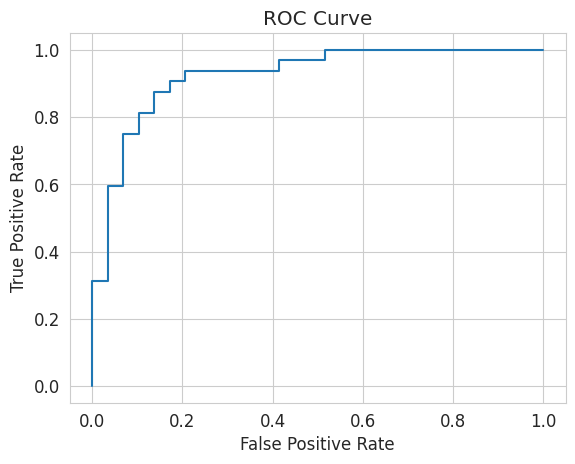

In [92]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

#y_test (true labels) and y_pred_proba (predicted probabilities) from ANN model
fpr, tpr, thresholds = roc_curve(y_test3, y_pred3_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


Another common metric is the Area Under the Curve, or AUC. This is a convenient way to capture the performance of a model in a single number, although it's not without certain issues. As a rule of thumb, an AUC can be classed as follows,

0.90 - 1.00 = excellent

0.80 - 0.90 = good

0.70 - 0.80 = fair

0.60 - 0.70 = poor

0.50 - 0.60 = fail

Let's see what the above ROC gives us,

In [93]:
auc(fpr, tpr)

np.float64(0.9234913793103448)

In [94]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the metrics to evaluate
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
results = {}

# Perform cross-validation for each metric
for metric in metrics:
  scores = []
  for train_index, test_index in cv.split(X3, y3):
    X_train3, X_test3 = X3[train_index], X3[test_index]
    y_train3, y_test3 = y3[train_index], y3[test_index]

    # Create and train the ANN model (same architecture as before)
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
    ann.add(tf.keras.layers.Dropout(0.5))
    ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
    ann.add(tf.keras.layers.Dropout(0.5))
    ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    ann.compile(optimizer = 'adamW', loss = 'binary_crossentropy', metrics = ['accuracy'])
    ann.fit(X_train3, y_train3, batch_size = 32, epochs = 300, verbose=0)

    # Make predictions
    y_pred3 = ann.predict(X_test3)
    y_pred3 = (y_pred3 > 0.5)

    # Calculate the score based on the current metric
    if metric == 'accuracy':
      score = accuracy_score(y_test3, y_pred3)
    elif metric == 'precision':
      score = precision_score(y_test3, y_pred3)
    elif metric == 'recall':
      score = recall_score(y_test3, y_pred3)
    elif metric == 'f1':
      score = f1_score(y_test3, y_pred3)
    elif metric == 'roc_auc':
      score = roc_auc_score(y_test3, y_pred3)

    scores.append(score)

  results[metric] = scores

# Print the cross-validation results
for metric in metrics:
  print(f'{metric.capitalize()}: {np.mean(results[metric]):.4f} (std: {np.std(results[metric]):.4f})')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 397ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
Accuracy: 0.7559 (std: 0.0357)
Precision: 0.7726 (std: 0.0518)
R

#Stacking

In [95]:
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Defining the base models
estimators = [
    ('rf', model),
    ('lr', logreg),
    ('knn', knn_classifier)
]

# Define the stacking classifier
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

# Fit the stacking model
stacking_model.fit(X_train, y_train)


StackingClassifier(estimators=[('rf', RandomForestClassifier(max_depth=5)),
                               ('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier(n_neighbors=12))],
                   final_estimator=LogisticRegression())

In [96]:
# Make predictions
y_pred = stacking_model.predict(X_test)

In [97]:
# Evaluate the stacking model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8852459016393442


In [98]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print("Precision:", precision)


Precision: 0.9310344827586207


In [99]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


F1 Score: 0.8852459016393442


In [100]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("Recall:", recall)


Recall: 0.84375


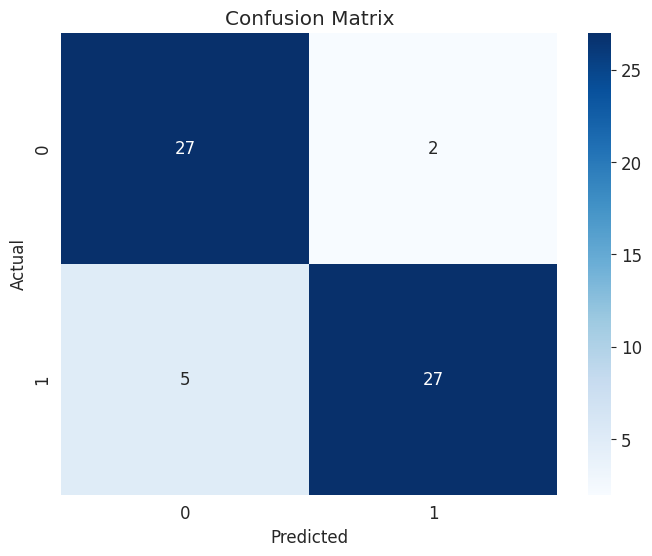

In [101]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [102]:
# Calculate sensitivity
sensitivity = cm[0, 0] / (cm[0, 0] + cm[1, 0])
print('Sensitivity:', sensitivity)
# Calculate specificity
specificity = cm[1, 1] / (cm[1, 1] + cm[0, 1])
print('Specificity:', specificity)

Sensitivity: 0.84375
Specificity: 0.9310344827586207


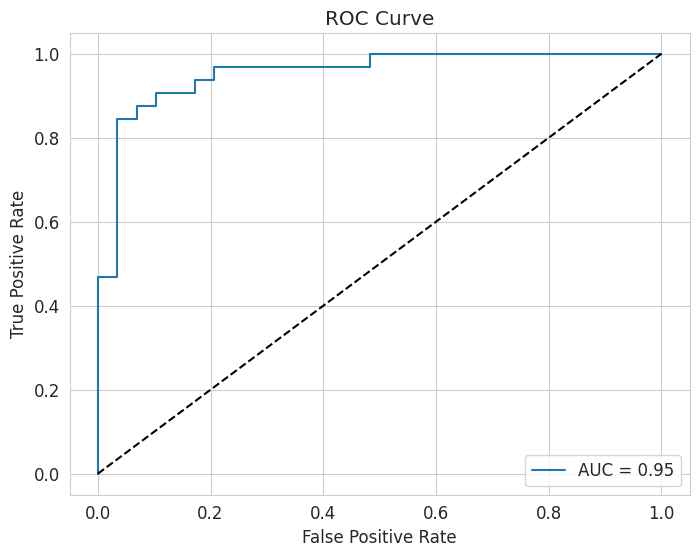

In [103]:
# ROC Curve and AUC
y_pred_proba = stacking_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [104]:
print(f'AUC: {roc_auc:.2f}')

AUC: 0.95


In [105]:
# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the metrics to evaluate
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
results = {}

# Perform cross-validation for each metric
for metric in metrics:
  scores = cross_val_score(stacking_model, X, y, cv=cv, scoring=metric)
  results[metric] = scores

# Print the cross-validation results
for metric in metrics:
  print(f'{metric.capitalize()}: {results[metric].mean():.4f} (std: {results[metric].std():.4f})')


Accuracy: 0.8450 (std: 0.0772)
Precision: 0.8457 (std: 0.0789)
Recall: 0.8909 (std: 0.0411)
F1: 0.8691 (std: 0.0570)
Roc_auc: 0.9041 (std: 0.0496)


Accuracy and precision values for each model

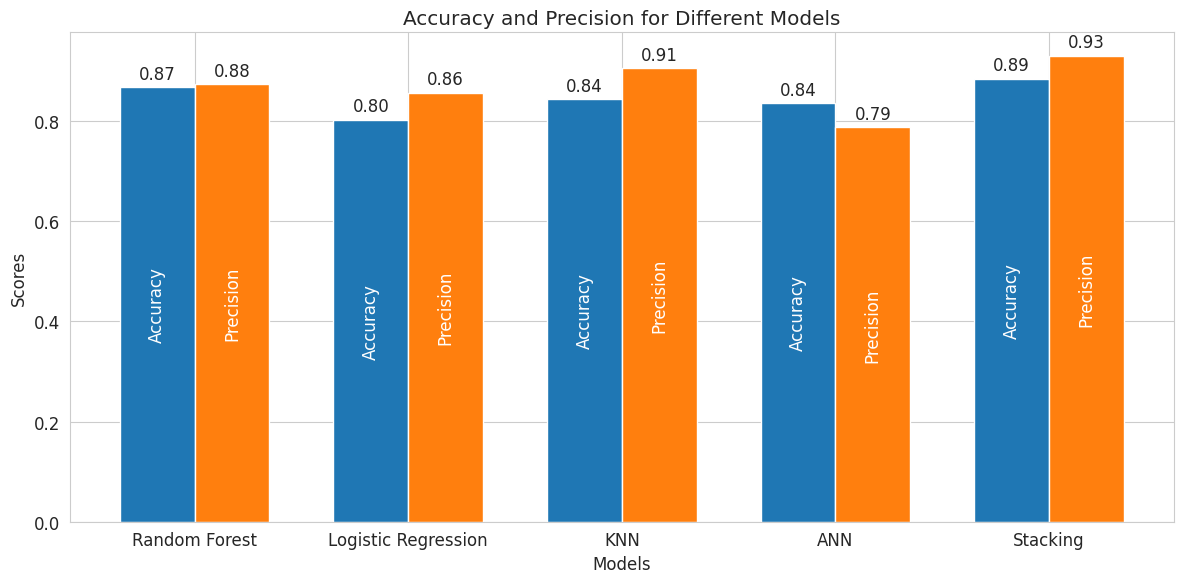

In [106]:
import matplotlib.pyplot as plt
import numpy as np
# Accuracy and precision values for each model (replace with your actual values)
accuracy_values = [accuracy_rf, accuracy_lr, accuracy_knn, accuracy_ann, accuracy]
precision_values = [precision_score(y_test, y_pred_bin), precision_score(y_testlr, y_predlr), precision_knn, precision_score(y_test3, y_pred3), precision]

# Model names
model_names = ['Random Forest', 'Logistic Regression', 'KNN', 'ANN', 'Stacking']

# Create bar positions
bar_width = 0.35
index = np.arange(len(model_names))

# Create the bar graph
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(index, accuracy_values, bar_width, label='Accuracy')
rects2 = ax.bar(index + bar_width, precision_values, bar_width, label='Precision')

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Accuracy and Precision for Different Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model_names)
ax.legend()

# Remove the indicator box
ax.legend_.remove()

# Display values on top of bars horizontally and add text inside bars vertically
def autolabel(rects, metric):
  for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
    ax.text(rect.get_x() + rect.get_width() / 2, height / 2, metric, ha='center', va='center', rotation=90, color='white')

autolabel(rects1, 'Accuracy')
autolabel(rects2, 'Precision')

plt.tight_layout()
plt.show()


#Testing the model
By giving a patient's features

In [135]:
##Stacking model testing
# new_sc = StandardScaler()
# X_train_scaled_for_stacking = new_sc.fit_transform(X_train) # This is no longer needed here as scaling is done after splitting

def get_user_input():
  """Gets user input for heart disease prediction features."""
  features = {
      "age": (20, 100),
      "sex": (0, 1),  # 0 for female, 1 for male
      "cp": (0, 3),  # Chest pain type (0-3)
      "trestbps": (90, 200),  # Resting blood pressure
      "chol": (100, 600),  # Serum cholesterol
      "fbs": (0, 1),  # Fasting blood sugar (0 or 1)
      "restecg": (0, 2),  # Resting electrocardiographic results (0-2)
      "thalach": (70, 200),  # Maximum heart rate achieved
      "exang": (0, 1),  # Exercise induced angina (0 or 1)
      "oldpeak": (0.0, 6.2),  # ST depression induced by exercise relative to rest
      "slope": (0, 2),  # The slope of the peak exercise ST segment (0-2)
      "ca": (0, 4),  # Number of major vessels (0, 1, 2, 3, or 4)
      "thal": (0, 3)  # Thalassemia (0, 1, 2, or 3)
  }

  user_input = {}
  print("Please enter the patient's health information:")
  for feature, (min_val, max_val) in features.items():
    while True:
      try:
        # For categorical features, ensure integer input and handle potential errors during conversion
        if feature in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']:
            value = int(input(f"Enter {feature} ({min_val}-{max_val}): "))
        else:
            value = float(input(f"Enter {feature} ({min_val}-{max_val}): "))

        if min_val <= value <= max_val:
          user_input[feature] = value
          break
        else:
          print(f"Invalid input for {feature}. Please enter a value within the range.")
      except ValueError:
        print(f"Invalid input for {feature}. Please enter a number.")

  # Create a DataFrame from user input
  user_df_initial = pd.DataFrame([user_input])
  print("\n--- user_df after initial input ---")
  display(user_df_initial)

  # Separate numerical and categorical columns
  numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
  categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

  user_df_numerical = user_df_initial[numerical_cols]

  # Convert categorical columns to 'object' dtype for one-hot encoding
  user_df_categorical = user_df_initial[categorical_cols].astype('object')

  # Apply one-hot encoding to the categorical features
  user_df_categorical_encoded = pd.get_dummies(user_df_categorical, columns=categorical_cols, drop_first=True)
  print("\n--- user_df after one-hot encoding categorical ---")
  display(user_df_categorical_encoded)

  # Concatenate numerical and encoded categorical features
  user_df_processed = pd.concat([user_df_numerical, user_df_categorical_encoded], axis=1)
  print("\n--- user_df after concatenating numerical and encoded categorical ---")
  display(user_df_processed)


  # Create a new DataFrame with all columns from X.columns and fill with 0
  user_df = pd.DataFrame(0, index=[0], columns=X.columns)

  # Update the new DataFrame with values from the processed user input
  for col in user_df_processed.columns:
      if col in user_df.columns:
          user_df[col] = user_df_processed[col]

  # Calculate Risk Factor Composite Score for user input
  # Ensure the necessary columns exist before calculation
  if all(col in user_df.columns for col in ['age', 'trestbps', 'chol']):
      user_df['risk_factor_score'] = (user_df['age'] * 0.3 +
                                       user_df['trestbps'] * 0.3 +
                                       user_df['chol'] * 0.4)
  else:
      print("Warning: Could not calculate risk_factor_score. Required columns not found in user input.")
      user_df['risk_factor_score'] = 0 # Default value or handle appropriately


  # Calculate Lifestyle-Adjusted Metric for user input
  # Check the exact column names after one-hot encoding
  user_df['lifestyle_metric'] = 0 # Initialize the metric

  if 'exercise_induced_angina_yes' in user_df.columns and user_df['exercise_induced_angina_yes'].values[0] == 1:
      user_df['lifestyle_metric'] -= 0.5 # Assuming 'yes' is a negative factor

  # Check for both possible fasting blood sugar columns after one-hot encoding
  if 'fasting_blood_sugar_greater than 120mg/ml' in user_df.columns and user_df['fasting_blood_sugar_greater than 120mg/ml'].values[0] == 1:
       user_df['lifestyle_metric'] -= 0.5 # Assuming 'greater than 120mg/ml' is a negative factor
  elif 'fasting_blood_sugar_lower than 120mg/ml' in user_df.columns and user_df['fasting_blood_sugar_lower than 120mg/ml'].values[0] == 1:
       user_df['lifestyle_metric'] += 0.5 # Assuming 'lower than 120mg/ml' is a positive factor


  print("\n--- Columns of user_df before scaling ---")
  print(user_df.columns)
  print("\n--- Columns of X (training data) ---")
  print(X.columns)


  # Align the user input DataFrame columns with the training data columns (X.columns)
  # This ensures the user input DataFrame has the same columns in the same order as the training data
  # user_df = user_df.reindex(columns=X.columns, fill_value=0) # Removed the problematic reindex
  print("\n--- user_df before scaling ---") # Label updated
  display(user_df)


  # Scale the user input using the same scaler fitted on the stacking model's training data
  user_df_scaled = sc.transform(user_df)

  return user_df, user_input_scaled

user_df, user_input_scaled = get_user_input()

# Use the stacking model for prediction
prediction = stacking_model.predict(user_input_scaled)

if prediction > 0.5:
  print("The patient is likely to have heart disease.")
else:
  print("The patient is unlikely to have heart disease.")

Please enter the patient's health information:
Enter age (20-100): 40
Enter sex (0-1): 1
Enter cp (0-3): 1
Enter trestbps (90-200): 150
Enter chol (100-600): 180
Enter fbs (0-1): 1
Enter restecg (0-2): 1
Enter thalach (70-200): 170
Enter exang (0-1): 1
Enter oldpeak (0.0-6.2): 6
Enter slope (0-2): 1
Enter ca (0-4): 3
Enter thal (0-3): 2

--- user_df after initial input ---


age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  40.0    1   1     150.0  180.0    1        1    170.0      1      6.0   

   slope  ca  thal  
0      1   3     2


--- user_df after one-hot encoding categorical ---


Empty DataFrame
Columns: []
Index: [0]


--- user_df after concatenating numerical and encoded categorical ---


age  trestbps   chol  thalach  oldpeak
0  40.0     150.0  180.0    170.0      6.0


--- Columns of user_df before scaling ---
Index(['age', 'resting_blood_pressure', 'cholesterol',
       'max_heart_rate_achieved', 'st_depression', 'num_major_vessels',
       'sex_male', 'chest_pain_type_atypical angina',
       'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina',
       'fasting_blood_sugar_lower than 120mg/ml',
       'rest_ecg_left ventricular hypertrophy', 'rest_ecg_normal',
       'exercise_induced_angina_yes', 'st_slope_flat', 'st_slope_upsloping',
       'thalassemia_fixed defect', 'thalassemia_normal',
       'thalassemia_reversable defect', 'risk_factor_score',
       'lifestyle_metric'],
      dtype='object')

--- Columns of X (training data) ---
Index(['age', 'resting_blood_pressure', 'cholesterol',
       'max_heart_rate_achieved', 'st_depression', 'num_major_vessels',
       'sex_male', 'chest_pain_type_atypical angina',
       'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina',
       'fasting_blood_sugar_lower than 12

age  resting_blood_pressure  cholesterol  max_heart_rate_achieved  \
0  40.0                       0            0                        0   

   st_depression  num_major_vessels  sex_male  \
0              0                  0         0   

   chest_pain_type_atypical angina  chest_pain_type_non-anginal pain  \
0                                0                                 0   

   chest_pain_type_typical angina  ...  rest_ecg_left ventricular hypertrophy  \
0                               0  ...                                      0   

   rest_ecg_normal  exercise_induced_angina_yes  st_slope_flat  \
0                0                            0              0   

   st_slope_upsloping  thalassemia_fixed defect  thalassemia_normal  \
0                   0                         0                   0   

   thalassemia_reversable defect  risk_factor_score  lifestyle_metric  
0                              0                  0                 0  

[1 rows x 21 columns]

The patient is likely to have heart disease.


In [136]:
# Calculate Risk Factor Composite Score
# This is a simplified example, you might want to adjust the weights based on domain knowledge or feature importance
dataset['risk_factor_score'] = (dataset['age'] * 0.3 +
                                 dataset['resting_blood_pressure'] * 0.3 +
                                 dataset['cholesterol'] * 0.4)

# Calculate Lifestyle-Adjusted Metric
# This is a simplified example, you might need to map categorical lifestyle features to numerical values
# Assuming 'exercise_induced_angina' and 'fasting_blood_sugar' are proxies for lifestyle factors
# You would typically need more direct measures of smoking, physical activity, and diet
# Check the exact column names after one-hot encoding
if 'exercise_induced_angina_yes' in dataset.columns and 'fasting_blood_sugar_greater than 120mg/ml' in dataset.columns:
    dataset['lifestyle_metric'] = (dataset['exercise_induced_angina_yes'] * -0.5 + # Assuming 'yes' is a negative factor
                                    dataset['fasting_blood_sugar_greater than 120mg/ml'] * -0.5) # Assuming 'greater than 120mg/ml' is a negative factor
elif 'exercise_induced_angina_yes' in dataset.columns and 'fasting_blood_sugar_lower than 120mg/ml' in dataset.columns:
     dataset['lifestyle_metric'] = (dataset['exercise_induced_angina_yes'] * -0.5 + # Assuming 'yes' is a negative factor
                                    dataset['fasting_blood_sugar_lower than 120mg/ml'] * 0.5) # Assuming 'lower than 120mg/ml' is a positive factor
else:
    # Handle the case where neither column exists, perhaps by adding the metric with a default value or raising an error
    print("Warning: Neither 'fasting_blood_sugar_greater than 120mg/ml' nor 'fasting_blood_sugar_lower than 120mg/ml' found in columns.")
    dataset['lifestyle_metric'] = 0 # Default value

# Select important features to display
# Start with a base list of important features
important_features_base = ['age', 'sex_male', 'chest_pain_type_typical angina', 'resting_blood_pressure',
                      'cholesterol', 'max_heart_rate_achieved',
                      'exercise_induced_angina_yes', 'st_depression', 'num_major_vessels',
                      'risk_factor_score', 'lifestyle_metric', 'target'] # Added new features and target

# Dynamically add the relevant fasting blood sugar column if it exists
if 'fasting_blood_sugar_greater than 120mg/ml' in dataset.columns:
    important_features_base.insert(important_features_base.index('max_heart_rate_achieved'), 'fasting_blood_sugar_greater than 120mg/ml')
elif 'fasting_blood_sugar_lower than 120mg/ml' in dataset.columns:
    important_features_base.insert(important_features_base.index('max_heart_rate_achieved'), 'fasting_blood_sugar_lower than 120mg/ml')

# Dynamically add the relevant thalassemia columns if they exist
if 'thalassemia_fixed defect' in dataset.columns:
    important_features_base.insert(important_features_base.index('risk_factor_score'), 'thalassemia_fixed defect')
if 'thalassemia_normal' in dataset.columns:
    important_features_base.insert(important_features_base.index('risk_factor_score'), 'thalassemia_normal')
if 'thalassemia_reversable defect' in dataset.columns:
    important_features_base.insert(important_features_base.index('risk_factor_score'), 'thalassemia_reversable defect')


# Filter the list to include only columns that actually exist in the dataset
important_features = [feature for feature in important_features_base if feature in dataset.columns]


# Display a table with important features
print("\n--- Dataset with Important Features ---")
display(dataset[important_features].head())

print("\n--- Explanation of New Features ---")
print("Risk Factor Composite Score: This is a weighted index combining age, resting blood pressure, and cholesterol to provide a single measure of clinical risk factors.")
print("Lifestyle-Adjusted Metric: This score integrates indicators related to exercise-induced angina and fasting blood sugar as a simplified representation of lifestyle-related risk.")


# Now, redefine X and y with the updated dataset
X = dataset.drop('target', axis=1)
y = dataset['target']

# Split the data again with the new features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Re-scale the training and testing data with the new features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Re-train the stacking model with the updated data
stacking_model.fit(X_train, y_train)




--- Dataset with Important Features ---


age  sex_male  chest_pain_type_typical angina  resting_blood_pressure  \
0   63      True                           False                     145   
1   37      True                           False                     130   
2   41     False                           False                     130   
3   56      True                           False                     120   
4   57     False                            True                     120   

   cholesterol  fasting_blood_sugar_lower than 120mg/ml  \
0          233                                    False   
1          250                                     True   
2          204                                     True   
3          236                                     True   
4          354                                     True   

   max_heart_rate_achieved  exercise_induced_angina_yes  st_depression  \
0                      150                        False            2.3   
1                      187                        False            3.5   
2                      172                        False            1.4   
3                      178                        False            0.8   
4                      163                         True            0.6   

   num_major_vessels  thalassemia_fixed defect  thalassemia_normal  \
0                  0                     False                True   
1                  0                      True               False   
2                  0                      True               False   
3                  0                      True               False   
4                  0                      True               False   

   thalassemia_reversable defect  risk_factor_score  lifestyle_metric  target  
0                          False              155.6               0.0       1  
1                          False              150.1               0.5       1  
2                          False              132.9               0.5       1  
3                          False              147.2               0.5       1  
4                          False              194.7               0.0       1


--- Explanation of New Features ---
Risk Factor Composite Score: This is a weighted index combining age, resting blood pressure, and cholesterol to provide a single measure of clinical risk factors.
Lifestyle-Adjusted Metric: This score integrates indicators related to exercise-induced angina and fasting blood sugar as a simplified representation of lifestyle-related risk.


StackingClassifier(estimators=[('rf', RandomForestClassifier(max_depth=5)),
                               ('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier(n_neighbors=12))],
                   final_estimator=LogisticRegression())

In [138]:
print("\n--- Patient's Processed Information (used by the model) ---")
print("This table shows the features as prepared for the model, including original numerical values and one-hot encoded categorical features.")


print("\n--- Calculation of New Features ---")
age_val = user_df['age'].values[0] if 'age' in user_df.columns else 0
trestbps_val = user_df['trestbps'].values[0] if 'trestbps' in user_df.columns else 0
chol_val = user_df['chol'].values[0] if 'chol' in user_df.columns else 0
risk_score_calc = (age_val * 0.3 + trestbps_val * 0.3 + chol_val * 0.4)
print(f"Risk Factor Composite Score = (age * 0.3) + (resting_blood_pressure * 0.3) + (cholesterol * 0.4)")
print(f"                          = ({age_val} * 0.3) + ({trestbps_val} * 0.3) + ({chol_val} * 0.4)")
print(f"                          = {risk_score_calc:.2f}")

lifestyle_metric_calc = 0
exang_yes_val = user_df['exercise_induced_angina_yes'].values[0] if 'exercise_induced_angina_yes' in user_df.columns else 0
fbs_greater_val = user_df['fasting_blood_sugar_greater than 120mg/ml'].values[0] if 'fasting_blood_sugar_greater than 120mg/ml' in user_df.columns else 0
fbs_lower_val = user_df['fasting_blood_sugar_lower than 120mg/ml'].values[0] if 'fasting_blood_sugar_lower than 120mg/ml' in user_df.columns else 0

print("\nLifestyle-Adjusted Metric (simplified):")
print("  - Decreased by 0.5 if exercise-induced angina is 'yes'")
print("  - Decreased by 0.5 if fasting blood sugar is 'greater than 120mg/ml'")
print("  - Increased by 0.5 if fasting blood sugar is 'lower than 120mg/ml'")

if exang_yes_val == 1:
    lifestyle_metric_calc -= 0.5
    print(f"  - Exercise-induced angina is 'yes': -0.5")

if fbs_greater_val == 1:
    lifestyle_metric_calc -= 0.5
    print(f"  - Fasting blood sugar is 'greater than 120mg/ml': -0.5")
elif fbs_lower_val == 1:
    lifestyle_metric_calc += 0.5
    print(f"  - Fasting blood sugar is 'lower than 120mg/ml': +0.5")

print(f"Lifestyle-Adjusted Metric = {lifestyle_metric_calc:.2f}")


print("\n--- Advice Based on Prediction and New Features ---")

if prediction > 0.5:
  print("Based on the model's prediction, the patient is likely to have heart disease.")
  print("Considering the 'Risk Factor Composite Score' and 'Lifestyle-Adjusted Metric', here are some points to consider:")
  print(f"- Risk Factor Composite Score: {user_df['risk_factor_score'].values[0]:.2f}")
  print(f"- Lifestyle-Adjusted Metric: {user_df['lifestyle_metric'].values[0]:.2f}")
  print("\nSuggestions:")
  print("- Consult with a healthcare professional immediately for further evaluation and guidance.")
  print("- Discuss your 'Risk Factor Composite Score' and 'Lifestyle-Adjusted Metric' with your doctor to understand their implications.")
  print("- Focus on aggressively managing individual risk factors like blood pressure, cholesterol, and lifestyle habits.")
else:
  print("Based on the model's prediction, the patient is unlikely to have heart disease.")
  print("Considering the 'Risk Factor Composite Score' and 'Lifestyle-Adjusted Metric', here are some points to consider:")
  print(f"- Risk Factor Composite Score: {user_df['risk_factor_score'].values[0]:.2f}")
  print(f"- Lifestyle-Adjusted Metric: {user_df['lifestyle_metric'].values[0]:.2f}")
  print("\nSuggestions:")
  print("- Continue to maintain a heart-healthy lifestyle.")
  print("- Regularly monitor your blood pressure and cholesterol levels.")
  print("- Discuss your 'Lifestyle-Adjusted Metric' with your doctor to identify areas for improvement in your habits.")
  print("- Schedule regular check-ups with your doctor for ongoing monitoring.")

print("\n--- Personalized Suggestions Based on Input ---")

# Add personalized suggestions based on specific input features and combinations
if user_df['resting_blood_pressure'].values[0] > 130:
    print("- Your resting blood pressure seems elevated. Consider strategies to manage blood pressure in consultation with your doctor.")
if user_df['cholesterol'].values[0] > 200:
    print("- Your cholesterol level appears high. Discuss cholesterol management options with your healthcare provider.")

# Check for fasting blood sugar columns before accessing
if 'fasting_blood_sugar_greater than 120mg/ml' in user_df.columns and user_df['fasting_blood_sugar_greater than 120mg/ml'].values[0] == 1:
    print("- Your fasting blood sugar is greater than 120mg/ml. Focus on managing blood sugar levels, especially if you have diabetes.")
elif 'fasting_blood_sugar_lower than 120mg/ml' in user_df.columns and user_df['fasting_blood_sugar_lower than 120mg/ml'].values[0] == 0:
     print("- Your fasting blood sugar is not lower than 120mg/ml. Focus on managing blood sugar levels.")


if 'exercise_induced_angina_yes' in user_df.columns and user_df['exercise_induced_angina_yes'].values[0] == 1:
    print("- You reported exercise-induced angina. It's important to discuss this with your doctor for proper evaluation and management.")

if user_df['age'].values[0] > 60 and (user_df['resting_blood_pressure'].values[0] > 130 or user_df['cholesterol'].values[0] > 200):
    print("- As an older adult with elevated blood pressure or cholesterol, you have an increased risk. Regular medical check-ups are highly recommended.")

if user_df['st_depression'].values[0] > 1.0 and (('exercise_induced_angina_yes' in user_df.columns and user_df['exercise_induced_angina_yes'].values[0] == 1) or ('st_slope_upsloping' in user_df.columns and user_df['st_slope_upsloping'].values[0] == 0 and 'st_slope_flat' in user_df.columns and user_df['st_slope_flat'].values[0] == 0)): # Assuming downsloping or flat slope after exercise is worse
    print("- Significant ST depression during exercise can indicate reduced blood flow to the heart. Combined with exercise-induced angina or an abnormal ST slope, further cardiac evaluation is advisable.")


# Add more conditions for other relevant features and combinations as needed

print("\n--- Functionalities for Exploring New Features ---")

# Functionality 1: Show how the patient's new features compare to the dataset
print("\nComparison of Patient's New Features to Dataset:")
print(user_df[['risk_factor_score', 'lifestyle_metric']])
print("\nDataset Averages:")
print(dataset[['risk_factor_score', 'lifestyle_metric']].mean())


# Functionality 2: (Example) Suggest potential areas for lifestyle improvement
# This is a simplified example and would need more sophisticated logic
print("\nPotential Areas for Lifestyle Improvement (Simplified):")
if 'exercise_induced_angina_yes' in user_df.columns and user_df['exercise_induced_angina_yes'].values[0] == 1:
    print("- Consider discussing exercise strategies with a healthcare professional.")
if 'fasting_blood_sugar_greater than 120mg/ml' in user_df.columns and user_df['fasting_blood_sugar_greater than 120mg/ml'].values[0] == 1:
     print("- Focus on managing blood sugar levels through diet and other recommendations.")
elif 'fasting_blood_sugar_lower than 120mg/ml' in user_df.columns and user_df['fasting_blood_sugar_lower than 120mg/ml'].values[0] == 1:
     print("- Consider strategies to lower fasting blood sugar.")



--- Patient's Processed Information (used by the model) ---
This table shows the features as prepared for the model, including original numerical values and one-hot encoded categorical features.

--- Calculation of New Features ---
Risk Factor Composite Score = (age * 0.3) + (resting_blood_pressure * 0.3) + (cholesterol * 0.4)
                          = (40.0 * 0.3) + (0 * 0.3) + (0 * 0.4)
                          = 12.00

Lifestyle-Adjusted Metric (simplified):
  - Decreased by 0.5 if exercise-induced angina is 'yes'
  - Decreased by 0.5 if fasting blood sugar is 'greater than 120mg/ml'
  - Increased by 0.5 if fasting blood sugar is 'lower than 120mg/ml'
Lifestyle-Adjusted Metric = 0.00

--- Advice Based on Prediction and New Features ---
Based on the model's prediction, the patient is likely to have heart disease.
Considering the 'Risk Factor Composite Score' and 'Lifestyle-Adjusted Metric', here are some points to consider:
- Risk Factor Composite Score: 0.00
- Lifestyle-Adjusted